In [3]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [42]:
runs = ['id81', 'id82', 'id83', 'id84']
runs = ['.']
tags = ['act_collective_pitch__deg_', 'act_generator_torque__Nm_', 'obs_rotational_speed__rad_s_', 'obs_power__kW_']
labels = {
#     tags[0]: ['epoch', 'reward'],
#    tags[1]: ['epoch', 'deaths'],
    tags[0]: ['step', 'pitch angle [deg]'],
    tags[1]: ['step', 'generator torque [Nm]'],
    tags[2]: ['step', 'rotational speed [rad/s]'],
    tags[3]: ['step', 'power']
}

In [43]:
# Load data
global_data = {}
for run in runs:
    global_data[run] = {}
    for tag in tags:
        filename = 'data/run-%s-tag-%s.json' % (run, tag)
        try:
            with open(filename, 'r') as f:
                global_data[run][tag] = json.loads(f.read())
        except:
            pass

In [24]:
# Define some helper functions
def get_step(run, tag):
    return [step for [time,step,value] in global_data[run][tag]]
def get_time(run, tag):
    return [time for [time,step,value] in global_data[run][tag]]
def get_value(run, tag):
    return [value for [time,step,value] in global_data[run][tag]]

def get_dict(run, tag):
    return dict([(step, value) for [time,step,value] in global_data[run][tag]])


In [44]:
# eval by tags
by_tags = {}
for tag in tags:
    by_tags[tag] = pd.DataFrame([get_dict(run, tag) for run in runs if run in global_data and tag in global_data[run]], runs).transpose()

In [41]:
# Plot the full timeline across all runs
def plot_all(tag):
    mean = by_tags[tag].mean(axis=1) 
    stddev = by_tags[tag].std(axis=1) * (1.68/math.sqrt(4))
    plt.plot(mean)
    plt.xlabel(labels[tag][0])
    plt.ylabel(labels[tag][1])
    plt.fill_between(mean.keys(), mean.values-stddev.values, mean.values+stddev.values, alpha=0.2)
    
for tag in tags:
    plot_all(tag)
    plt.savefig('plot%s.png' % tag, dpi=300)
    plt.close()

In [186]:
by_tags[tags[2]]

,.
0,192970.25
1,338470.25
2,483970.25
3,629470.25
4,774970.25
...,...
178337,0.00
178338,0.00
178339,0.00
178340,0.00


In [190]:
# find mean and max
data = by_tags[tags[0]]


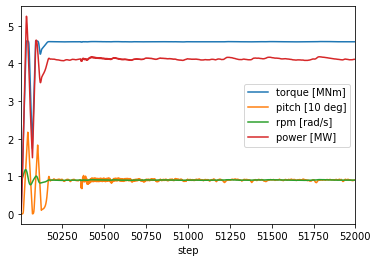

In [52]:
# plot a single epoch
epoch = 25
run = '.'
pitch = tags[0]
torque = tags[1]
rpm = tags[2]
power = tags[3]
start = epoch*2000 + 1
end = (epoch+1)*2000 + 1

data = pd.DataFrame({
    "torque [MNm]": by_tags[torque][run][start:end]/1000000,
    "pitch [10 deg]": by_tags[pitch][run][start:end]/10,
    "rpm [rad/s]": by_tags[rpm][run][start:end],
    "power [MW]": by_tags[power][run][start:end]/1000,
})

data.plot()
plt.xlabel("step")
plt.savefig('crashing turbines.png', dpi=300)

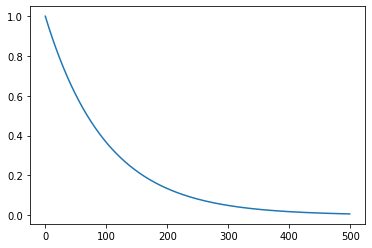

In [220]:
plt.plot([(0.99**x) for x in range(0, 500)])

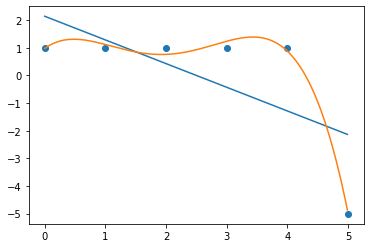

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



x = np.array([0,1,2,3,4,5])
x_plot = np.array([i/100 for i in range(0, 500)])
y = np.array([1,1,1,1,1,-5])

plt.scatter(x, y)

x = x[:, np.newaxis]
x_plot = x_plot[:, np.newaxis]
y = y[:, np.newaxis]


model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x_plot)

plt.plot(x_plot, y_pred)


polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)
x_poly_plot = polynomial_features.fit_transform(x_plot)

model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = np.clip(model.predict(x_poly_plot), -10, 5)

plt.plot(x_plot, y_poly_pred)

plt.savefig('overfit.png', dpi=300)


,norm+3,norm-3
1,13.0,13.0
2,3.0,10.0
3,5.0,10.0
4,3.0,6.0
5,9.0,4.0
6,11.0,0.0
7,18.0,0.0
8,14.0,0.0
9,8.0,0.0
10,17.0,0.0


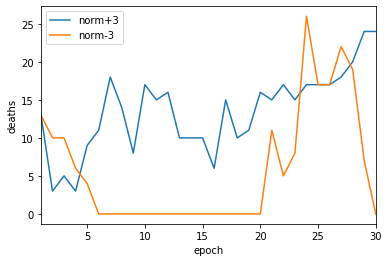

In [36]:
def plot_runs(tag):
    data = {}
    for run in runs:
        data[run] = by_tags[tag][run][0:30]
    data = pd.DataFrame(data)
    
    data.plot()
    plt.xlabel(labels[tag][0])
    plt.ylabel(labels[tag][1])
    plt.savefig('deaths.png', dpi=300)
    return data

plot_runs(tags[1])